In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from munch import Munch

In [2]:
df = pd.read_csv("throughput_results.csv")
df.columns

Index(['batch_size', 'vocab_size', 'config_name', 'seq_len', 'n_layers',
       'h_dim', 'mlp_dim', 'head_dim', 'n_heads', 'compile', 'class', 'config',
       'performance test', 'number of parameters',
       'number of non-embedding parameters', 'device',
       'model memory usage megabytes', 'step memory usage in megabytes',
       'tokens per batch', 'avg step duration in ms',
       'std step duration in ms', 'avg iterations per second',
       'std iterations per second', 'tokens per second', 'OOM', 'flops',
       'macs', 'params'],
      dtype='object')

In [3]:
is_quasi_lst = []
for m in df['config'].to_list():
    m = eval(m)
    if 'is_quasi' in m.keys():
        is_quasi_lst.append(m['is_quasi'])
    else:
        is_quasi_lst.append(False)
df = df.assign(is_quasi=is_quasi_lst)

In [4]:
set(df['vocab_size'].to_list())

{16384}

In [5]:
set(df['config_name'].to_list())

{'large', 'medium', 'mini', 'small', 'tiny'}

In [6]:
set(df['device'].to_list())

{'NVIDIA GeForce RTX 3090', 'Tesla V100-SXM2-32GB-LS'}

In [7]:
!pwd

/home/imanol/languini-kitchen/languini/projects/lstm


In [8]:
vocab_size = 16384

/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

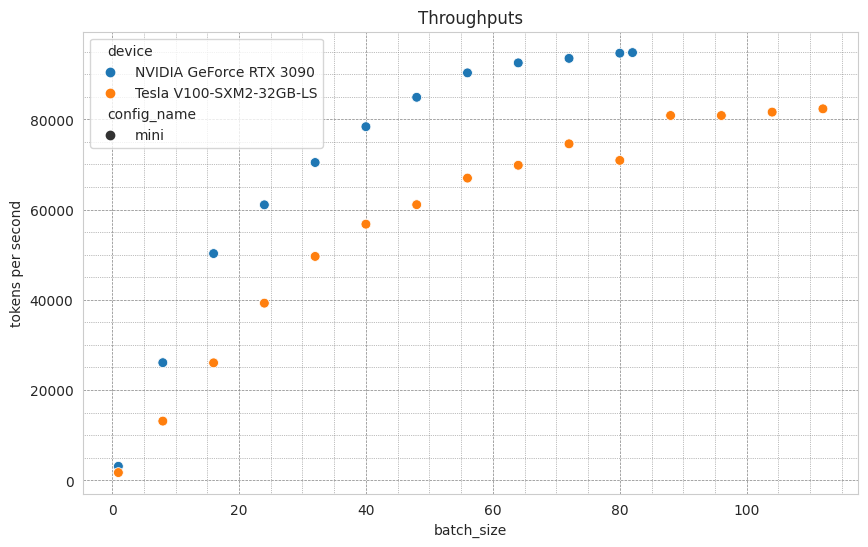

In [9]:
fdf = df[(df.vocab_size == vocab_size) & (df.config_name.str.contains('mini')) & (df['tokens per second'] > 0)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf, y='tokens per second', x='batch_size', hue='device', style='config_name', s=50)
plt.title('Throughputs')

# Add more gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)


/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imanol/languini-kitchen/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

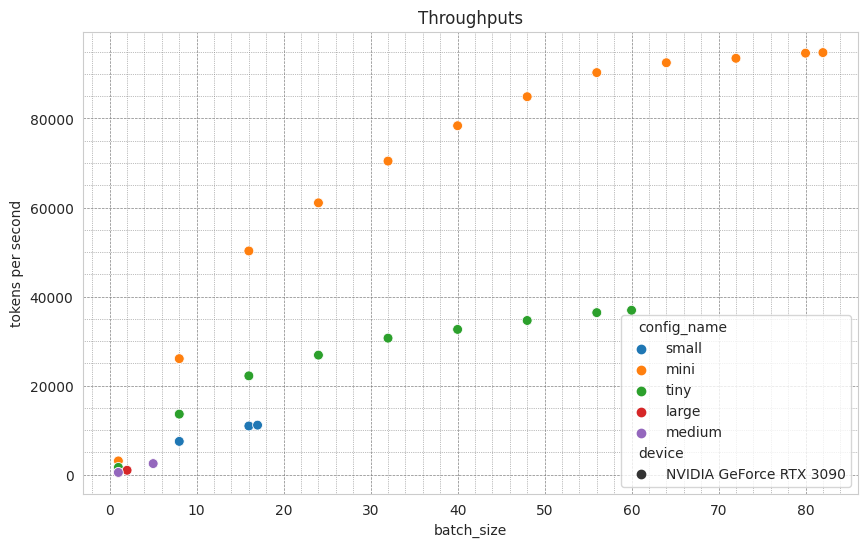

In [10]:
fdf = df[
    (df.vocab_size == vocab_size) & 
    (df.device.str.contains('3090')) & 
    (df['tokens per second'] > 0) &
    (df['is_quasi'] == True)
]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf, y='tokens per second', x='batch_size', hue='config_name', style='device', s=50)
plt.title('Throughputs')

# Add more gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)


In [11]:
fdf[['config_name', 'is_quasi', 'batch_size', 'tokens per second', 'device']].sort_values(['config_name','batch_size'])

,config_name,is_quasi,batch_size,tokens per second,device
34,large,True,1,489,NVIDIA GeForce RTX 3090
35,large,True,2,1006,NVIDIA GeForce RTX 3090
89,medium,True,1,523,NVIDIA GeForce RTX 3090
90,medium,True,5,2509,NVIDIA GeForce RTX 3090
7,mini,True,1,3106,NVIDIA GeForce RTX 3090
8,mini,True,8,26065,NVIDIA GeForce RTX 3090
9,mini,True,16,50246,NVIDIA GeForce RTX 3090
10,mini,True,24,61045,NVIDIA GeForce RTX 3090
11,mini,True,32,70420,NVIDIA GeForce RTX 3090
12,mini,True,40,78360,NVIDIA GeForce RTX 3090


## Compute training steps for a specific number of gpu hours and batch size

In [12]:
# EDIT THE NUMBER OF RTX 3090 GPU HOURS AND MODEL SIZE HERE AND RERUN ALL CELLS BELOW
gpu_hours = 6
config_name = 'mini'
device = '3090'

In [13]:
fdf = df[(df.vocab_size == vocab_size) & (df.device.str.contains(device)) & (df['tokens per second'] > 0)]
tokens_per_second = fdf[fdf['config_name']==config_name]['tokens per second'].max()

fdf[(fdf['config_name']==config_name) & (fdf['tokens per second'] == tokens_per_second)][['config_name', 'is_quasi', 'vocab_size', 'batch_size', 'tokens per second', 'device']]

,config_name,is_quasi,vocab_size,batch_size,tokens per second,device
18,mini,True,16384,82,94781,NVIDIA GeForce RTX 3090


In [14]:
print(tokens_per_second)

94781


In [15]:
tokens = gpu_hours * 60 * 60 * tokens_per_second
print(f"tokens to process: {tokens:,}")

tokens to process: 2,047,269,600


In [16]:
bsz = 80
seq_len = 512

steps = round(tokens / bsz / seq_len)
print(f"train steps: {steps:}")

train steps: 49982


In [17]:
n_workers = 1
gradient_accumulation_steps = 1
bsz / n_workers / gradient_accumulation_steps

80.0

In [18]:
print(f"{tokens / (n_workers * tokens_per_second) / 60 / 60:.2f} hours estimated running time")

6.00 hours estimated running time


In [19]:
df[
    (df.config_name == config_name) & 
    (df.vocab_size == vocab_size) &
    (df.device.str.contains('V100'))
][['config_name', 'batch_size', 'tokens per second', 'device']]

,config_name,batch_size,tokens per second,device
70,mini,1,1710,Tesla V100-SXM2-32GB-LS
71,mini,8,13118,Tesla V100-SXM2-32GB-LS
72,mini,16,26027,Tesla V100-SXM2-32GB-LS
73,mini,24,39252,Tesla V100-SXM2-32GB-LS
74,mini,32,49610,Tesla V100-SXM2-32GB-LS
75,mini,40,56757,Tesla V100-SXM2-32GB-LS
76,mini,48,61079,Tesla V100-SXM2-32GB-LS
77,mini,56,66968,Tesla V100-SXM2-32GB-LS
78,mini,64,69813,Tesla V100-SXM2-32GB-LS
79,mini,72,74563,Tesla V100-SXM2-32GB-LS
